In [1]:
from train import train
from visualize import plot_model, plot_models, plot_stats
from distributions import *
from divergence import forward_kl, reverse_kl, js_divergence
from mixture_model import MixtureModel, GumbelMixtureModel

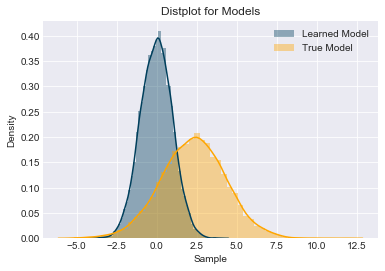

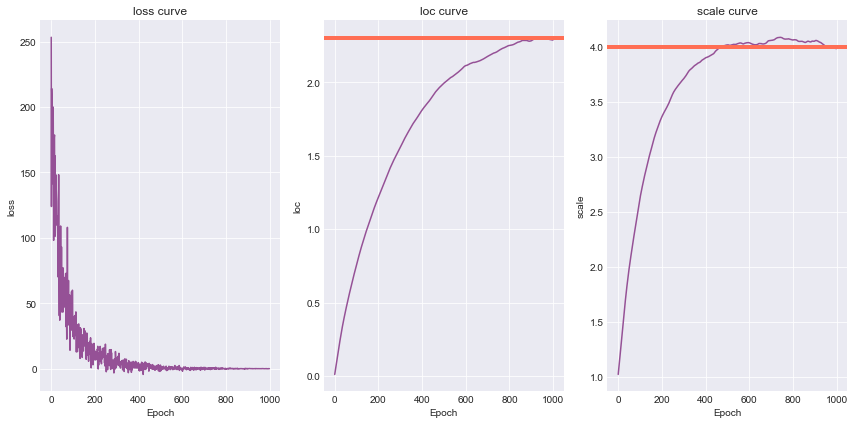

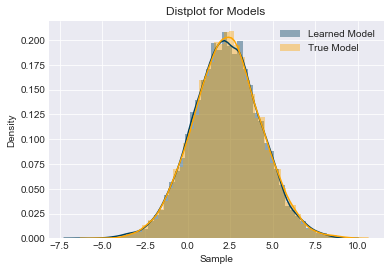

In [20]:
q_model = Normal([0.0],[[1.0]])
p_model = Normal([2.3], [[4.0]])

plot_models(p_model, q_model)
stats = train(p_model, q_model, forward_kl)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])
plot_models(p_model, q_model)

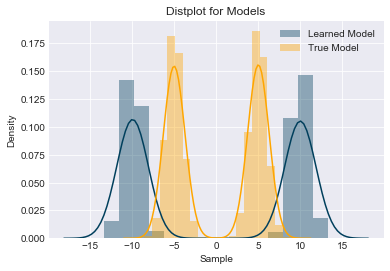

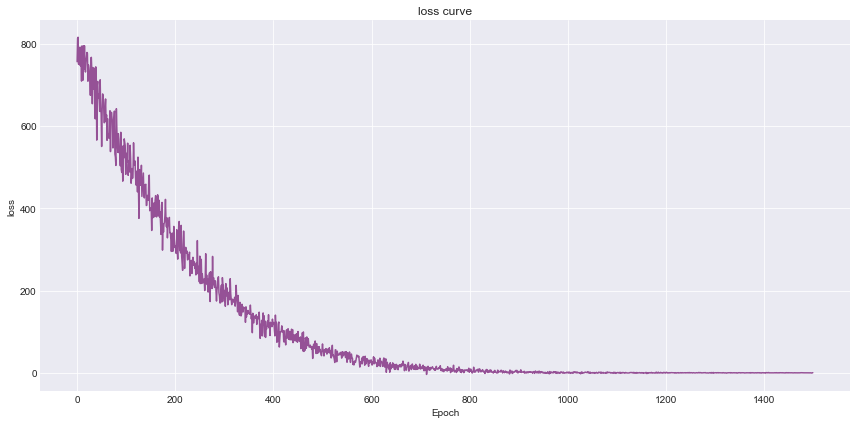

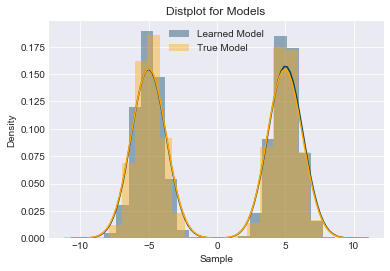

In [22]:
p_model = MixtureModel([Normal([-5.0], [[1.0]]), 
                        Normal([5.0], [[1.0]])], 
                       [0.5, 0.5])
q_model = MixtureModel([Normal([-10.0], [[1.0]]), 
                        Normal([10.0], [[1.0]])], 
                       [0.5, 0.5])

plot_models(p_model, q_model)
stats = train(p_model, q_model, reverse_kl, epochs=1500)
plot_stats(stats)
plot_models(p_model, q_model)

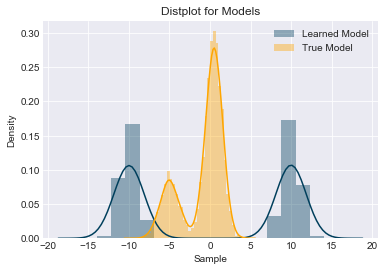

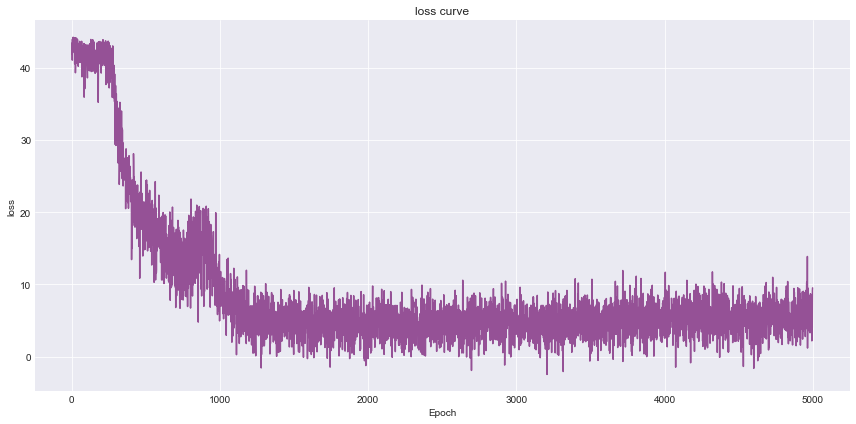

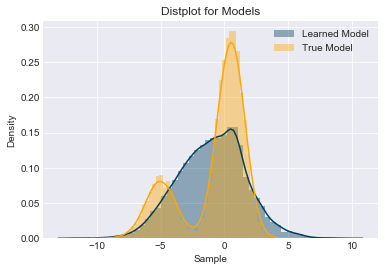

In [27]:
p_model = GumbelMixtureModel([Normal([-5.0], [[1.4]]), 
                        Normal([0.5], [[1.0]])], 
                       [0.25, 0.75])
q_model = GumbelMixtureModel([Normal([-10.0], [[1.0]]), 
                              Normal([10.0], [[1.0]])], 
                              [0.5, 0.5])

plot_models(p_model, q_model)
stats = train(p_model, q_model, js_divergence, epochs=5000)
plot_stats(stats)
plot_models(p_model, q_model)

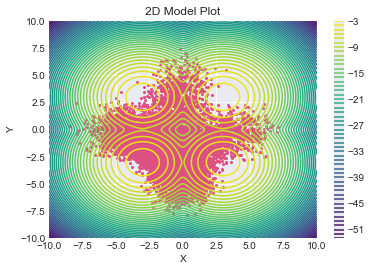

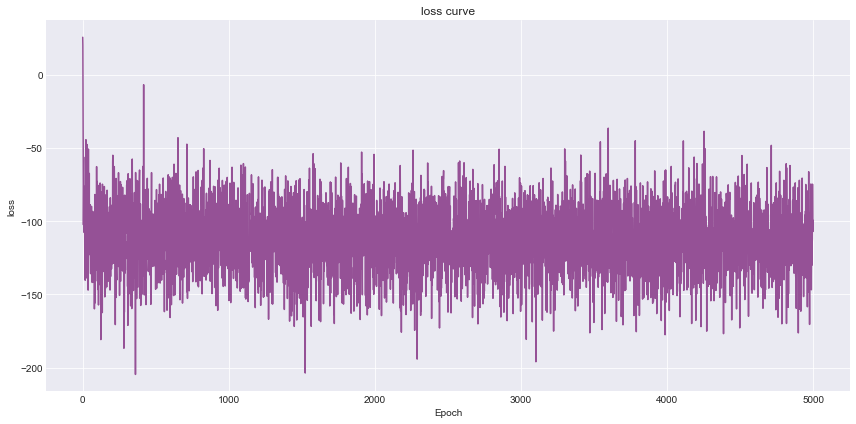

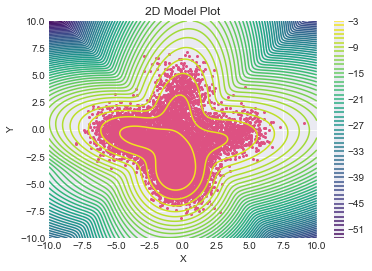

tensor([0.2933, 0.1687, 0.3983, 0.1397], grad_fn=<SoftmaxBackward>)

In [33]:
q_model = GumbelMixtureModel([Normal([-3.0, -3.0], [[1.0, 0], [0, 1]]), 
                         Normal([3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([3.0, -3.0], [[1.0, 0], [0, 1.0]])], 
                         [0.25, 0.25, 0.25, 0.25], hard=False)

p_model = GumbelMixtureModel([Normal([0.0, 5.0], [[1.0, 0], [0, 1.0]]),
                         Normal([0.0, -5.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-5.0, 0.0], [[1.0, 0], [0, 1.0]]),
                         Normal([5.0, 0.0], [[1.0, 0], [0, 1.0]])], 
                         [0.1, 0.5, 0.3, 0.1], hard=False, temperature=0.7)

plot_models(p_model, q_model)
stats = train(p_model, q_model, forward_kl, lr=0.1, 
              epochs=5000, track_parameters=False)
plot_stats(stats)
plot_models(p_model, q_model)
q_model.categorical.probs

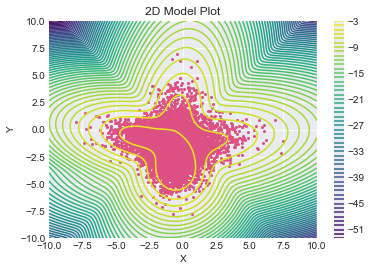

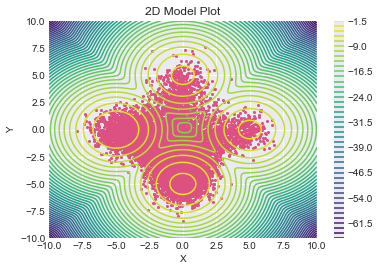

In [34]:
plot_model(q_model)
plot_model(p_model)

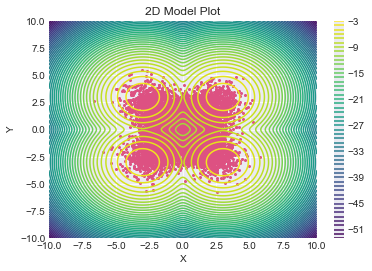

(array([  4.,  30.,  84., 159., 180., 207., 171., 120.,  35.,  10.]),
 array([-5.0035768 , -4.0188847 , -3.0341926 , -2.0495005 , -1.0648084 ,
        -0.08011627,  0.9045758 ,  1.8892679 ,  2.87396   ,  3.858652  ,
         4.843344  ], dtype=float32),
 <a list of 10 Patch objects>)

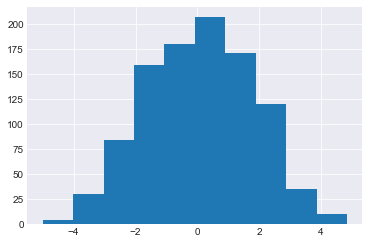

In [45]:
q_model = GumbelMixtureModel([Normal([-3.0, -3.0], [[1.0, 0], [0, 1]]), 
                         Normal([3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([3.0, -3.0], [[1.0, 0], [0, 1.0]])], 
                         [0.25, 0.25, 0.25, 0.25], hard=False, temperature=1.0)

plot_model(q_model)
import matplotlib.pyplot as plt
plt.hist(q_model.sample(1000).detach().numpy()[:,0])